In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
!git clone https://github.com/RAlfin25/Capstone-BANGKIT-ML-Path.git
%ls

fatal: destination path 'Capstone-BANGKIT-ML-Path' already exists and is not an empty directory.
Capstone-BANGKIT-ML-Path/  sample_data/


In [ ]:
train_path = "/content/Capstone-BANGKIT-ML-Path/FishImgDataset/train"
test_path = "/content/Capstone-BANGKIT-ML-Path/FishImgDataset/test"
validation_path = "/content/Capstone-BANGKIT-ML-Path/FishImgDataset/val"

In [ ]:
image_classes = os.listdir("/content/Capstone-BANGKIT-ML-Path/FishImgDataset/train")
image_classes

['Black Spotted Barb',
 'Tilapia',
 'Big Head Carp',
 'Pangasius',
 'Catfish',
 'Silver Perch',
 'Goby',
 'Silver Carp',
 'Mudfish',
 'Green Spotted Puffer',
 'Jaguar Gapote',
 'Bangus',
 'Tenpounder',
 'Snakehead',
 'Silver Barb',
 'Perch',
 'Mosquito Fish',
 'Fourfinger Threadfin',
 'Gold Fish',
 'Mullet',
 'Gourami',
 'Scat Fish',
 'Long-Snouted Pipefish',
 'Knifefish',
 'Glass Perchlet',
 'Climbing Perch',
 'Grass Carp',
 'Janitor Fish',
 'Indo-Pacific Tarpon',
 'Freshwater Eel',
 'Indian Carp']

In [ ]:
def plot_images(image_classes):
    plt.figure(figsize = (14, 14))

    for i, category in enumerate(image_classes):
        image_path = train_path + "/" + category
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_path = image_path + "/" + first_image

        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(8,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis("off")
    plt.show()

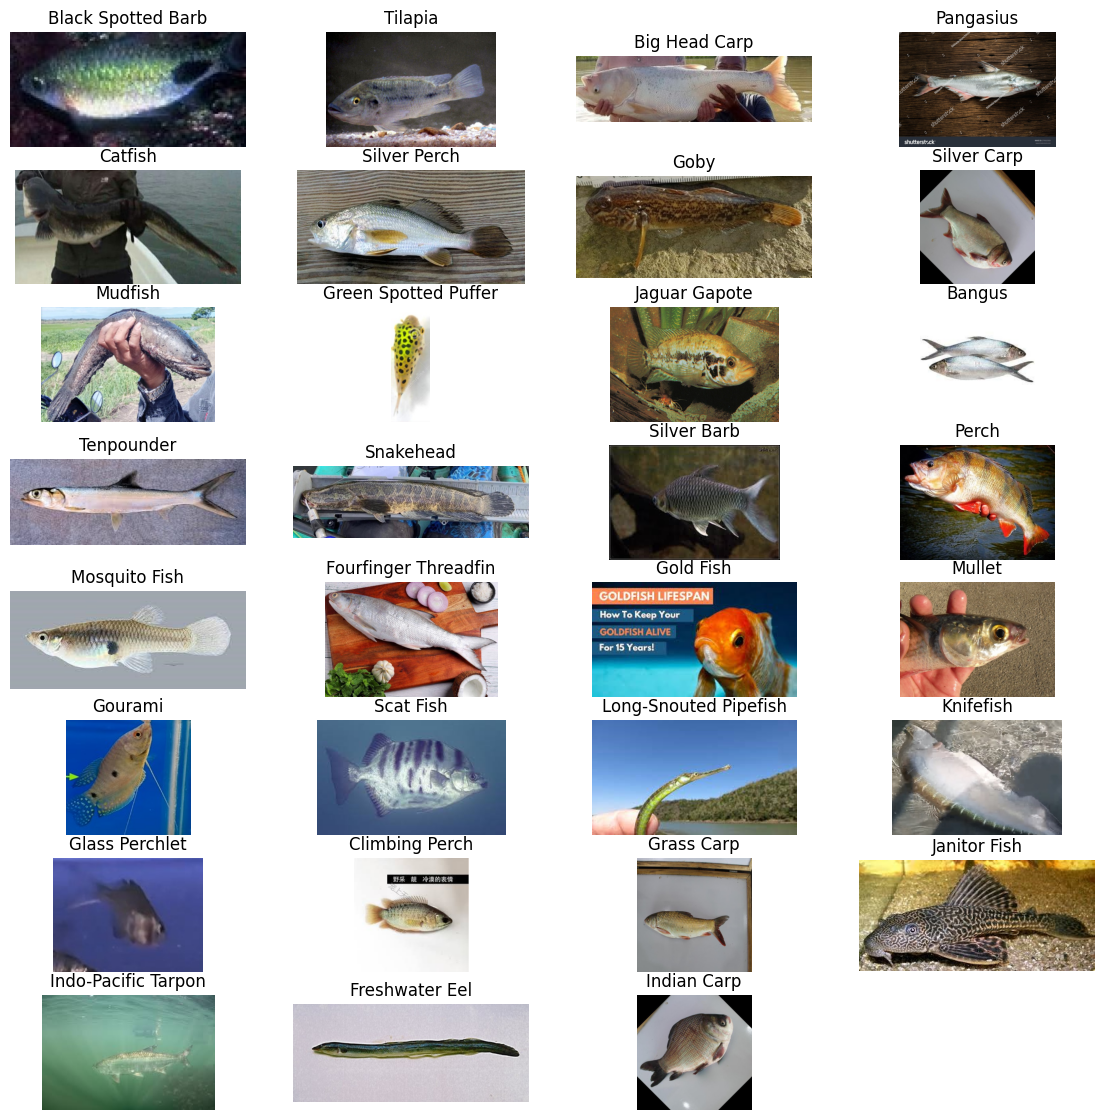

In [ ]:
plot_images(image_classes)

In [ ]:
image_generator = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_data = image_generator.flow_from_directory(train_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = "categorical")

test_data = image_generator.flow_from_directory(train_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = "categorical")

validation_data = image_generator.flow_from_directory(train_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = "categorical")

Found 8791 images belonging to 31 classes.
Found 8791 images belonging to 31 classes.
Found 8791 images belonging to 31 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",
                 input_shape = [150, 150, 3])
         )

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional Layer
model.add(Conv2D(filters = 64,
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",)
         )

# Pooling Layer
model.add(MaxPooling2D())

# CLASSIFICATION

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation = "relu"))

# Output Layer
model.add(Dense(31, activation = "softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 87616)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

model_history = model.fit(train_data,
                         epochs = 5,
                         validation_data = validation_data)

Epoch 1/5
275/275 [==============================] - 492s 2s/step - loss: 2.9573 - accuracy: 0.2319 - val_loss: 2.1128 - val_accuracy: 0.4575
Epoch 2/5
275/275 [==============================] - 490s 2s/step - loss: 1.8286 - accuracy: 0.4936 - val_loss: 1.1395 - val_accuracy: 0.6918
Epoch 3/5
275/275 [==============================] - 495s 2s/step - loss: 0.9787 - accuracy: 0.7265 - val_loss: 0.4984 - val_accuracy: 0.8774
Epoch 4/5
275/275 [==============================] - 512s 2s/step - loss: 0.4226 - accuracy: 0.8851 - val_loss: 0.1904 - val_accuracy: 0.9587
Epoch 5/5
275/275 [==============================] - 500s 2s/step - loss: 0.1634 - accuracy: 0.9602 - val_loss: 0.0703 - val_accuracy: 0.9859
